## Principal component analysis (PCA)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from IPython.display import Image
from IPython.core.display import HTML 
from pylab import rcParams

import sklearn
from sklearn import datasets

In [4]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [5]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### PCA on the iris dataset

In [6]:
#Import labels (these will the target variables we will use to predict)
labels = pd.read_csv("/content/drive/MyDrive/ENG 4000/labels.csv") 
labels.head()

Sample ID  Pollen
0          0       0
1          1       0
2          2       0
3          3       0
4          4       0

In [7]:
#Import features (these will the be data we use to predict the labels)
lifetime = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime.csv")
lifetime.head() #Head allows us to show the first 4 rows of the data

Sample ID  350-400 nm, t=0  350-400 nm, t=1  350-400 nm, t=2  \
0          0        -0.010454         0.000201         0.010856   
1          1         0.119942         0.184249         0.248555   
2          2        -0.016149         0.063383         0.142915   
3          3         0.067116         0.198401         0.329687   
4          4        -0.043760         0.090762         0.225284   

   350-400 nm, t=3  350-400 nm, t=4  350-400 nm, t=5  350-400 nm, t=6  \
0         0.114194         0.217531         0.166868         0.116204   
1         0.236994         0.225434         0.098988        -0.028179   
2         0.286637         0.430359         0.262414         0.094469   
3         0.366400         0.403114         0.235325         0.067536   
4         0.214749         0.204214         0.213128         0.222042   

   350-400 nm, t=7  350-400 nm, t=8  ...  672-800 nm, t=14  672-800 nm, t=15  \
0         0.109168         0.102131  ...         -0.015480         -0.016084   
1        -0.054191        -0.081647  ...          0.013006          0.028179   
2         0.082761         0.071054  ...          0.024223          0.023819   
3         0.063644         0.059752  ...         -0.008100         -0.006627   
4         0.133712         0.044571  ...         -0.059157         -0.068882   

   672-800 nm, t=16  672-800 nm, t=17  672-800 nm, t=18  672-800 nm, t=19  \
0         -0.017089         -0.014877         -0.013068         -0.003418   
1          0.043353          0.057081          0.070809          0.057081   
2          0.023415          0.014534          0.005248         -0.009285   
3         -0.005365         -0.001999          0.001262          0.003787   
4         -0.080227         -0.052674         -0.026742         -0.004052   

   672-800 nm, t=20  672-800 nm, t=21  672-800 nm, t=22  672-800 nm, t=23  
0          0.006031          0.011460          0.016888          0.013872  
1          0.043353          0.013728         -0.016618         -0.026012  
2         -0.024627         -0.027049         -0.030279         -0.015745  
3          0.006312          0.007469          0.008626          0.004103  
4          0.017828          0.031605          0.045381          0.020259  

[5 rows x 97 columns]

In [8]:
spectrum = pd.read_csv("/content/drive/MyDrive/ENG 4000/spectrum.csv")
spectrum.head()

Sample ID  350 nm, t=0  364 nm, t=0  379 nm, t=0  393 nm, t=0  408 nm, t=0  \
0          0     0.129278     0.041910     0.121054     0.496012     0.800121   
1          1    -0.011963     0.086481     0.099374     0.132618     0.527263   
2          2    -0.006165     0.110295     0.157199     0.232229     0.404684   
3          3    -0.005657     0.036070     0.101411     0.245322     0.426752   
4          4    -0.007325     0.063621     0.125746     0.214150     0.409600   

   422 nm, t=0  437 nm, t=0  451 nm, t=0  466 nm, t=0  ...  669 nm, t=3  \
0     1.000000     0.853183     0.962091     0.745947  ...     0.000000   
1     0.820056     0.939995     1.000000     0.914903  ...     0.000000   
2     0.739406     1.000000     0.887348     0.716564  ...     0.000000   
3     0.674580     0.992005     1.000000     0.851382  ...    -0.000191   
4     0.782647     1.000000     0.770002     0.544802  ...     0.001524   

   683 nm, t=3  698 nm, t=3  712 nm, t=3  727 nm, t=3  741 nm, t=3  \
0     0.000000          0.0     0.000144    -0.000576    -0.000790   
1     0.000000          0.0     0.000286    -0.001143    -0.001451   
2     0.000000          0.0     0.000000     0.000000    -0.000157   
3     0.000048          0.0     0.000000     0.000000     0.000000   
4    -0.000381          0.0     0.000466    -0.001863    -0.001919   

   756 nm, t=3  770 nm, t=3  785 nm, t=3   800 nm, t=3  
0    -0.000681    -0.000004    -0.000105 -1.480000e-19  
1    -0.001815    -0.000667    -0.000672 -9.580000e-19  
2     0.000630     0.000892     0.000630 -3.147950e-04  
3    -0.000130     0.000519     0.000606  1.038110e-03  
4    -0.004657    -0.003952    -0.003444 -4.060000e-18  

[5 rows x 129 columns]

In [9]:
scattering = pd.read_csv("/content/drive/MyDrive/ENG 4000/scattering.csv")
scattering.head()

Sample ID  angle=-37.5, t=0  angle=-37.5, t=1  angle=-37.5, t=2  \
0          0               0.0               0.0               0.0   
1          1               0.0               0.0               0.0   
2          2               0.0               0.0               0.0   
3          3               0.0               0.0               0.0   
4          4               0.0               0.0               0.0   

   angle=-37.5, t=3  angle=-37.5, t=4  angle=-37.5, t=5  angle=-37.5, t=6  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   angle=-37.5, t=7  angle=-37.5, t=8  ...  angle=37.5, t=110  \
0               0.0               0.0  ...           0.000000   
1               0.0               0.0  ...           0.000000   
2               0.0               0.0  ...           0.000000   
3               0.0               0.0  ...         982.383616   
4               0.0               0.0  ...           0.000000   

   angle=37.5, t=111  angle=37.5, t=112  angle=37.5, t=113  angle=37.5, t=114  \
0            0.00000           0.000000           0.000000           0.000000   
1            0.00000           0.000000           0.000000           0.000000   
2            0.00000           0.000000           0.000000           0.000000   
3         1002.18053        1034.797552         892.183468         840.017425   
4            0.00000           0.000000           0.000000           0.000000   

   angle=37.5, t=115  angle=37.5, t=116  angle=37.5, t=117  angle=37.5, t=118  \
0           0.000000           0.000000            0.00000           0.000000   
1           0.000000           0.000000            0.00000           0.000000   
2           0.000000           0.000000            0.00000           0.000000   
3         739.383196         740.476799          600.65502         695.104062   
4           0.000000           0.000000            0.00000           0.000000   

   angle=37.5, t=119  
0           0.000000  
1           0.000000  
2           0.000000  
3         873.792882  
4           0.000000  

[5 rows x 2401 columns]

In [10]:
size = pd.read_csv("/content/drive/MyDrive/ENG 4000/size.csv")
size.head()

Unnamed: 0       size
0           0  12.513989
1           1  19.461646
2           2  25.726931
3           3  35.178985
4           4   4.672308

In [11]:
lifetime_features = pd.read_csv("/content/drive/MyDrive/ENG 4000/lifetime_features.csv")
lifetime_features.head()

Unnamed: 0  lt feature 1  lt feature 2  lt feature 3  lt feature 4
0           0      0.280202           1.0      0.134079     -0.008439
1           1      0.481173           1.0      0.266975      0.140432
2           2      0.519641           1.0      0.145762      0.002905
3           3      0.639556           1.0      0.305319     -0.015814
4           4      0.624575           1.0      0.396259     -0.059949

In [12]:
data = {'lifetime':lifetime,
        'spectrum':spectrum,
        'scattering':scattering,
        'size':size,
        'lifetime_features':lifetime_features}
pd.set_option('display.max_rows',None)
for x in data:
  print(x)
  print(f'Nulls: {(data[x][data[x].isna().any(axis=1)].sum() > 0).sum()}')
  print(f'Duplicates: {data[x].duplicated().sum()}\n')

  #No null features so we will not need to adjust our dataset

lifetime
Nulls: 0
Duplicates: 0

spectrum
Nulls: 0
Duplicates: 0

scattering
Nulls: 0
Duplicates: 0

size
Nulls: 0
Duplicates: 0

lifetime_features
Nulls: 0
Duplicates: 0



In [13]:
labels.info() #Check the data types and how many nulls in the labels table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9866 entries, 0 to 9865
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sample ID  9866 non-null   int64
 1   Pollen     9866 non-null   int64
dtypes: int64(2)
memory usage: 154.3 KB


In [14]:
labels['Pollen'].unique() #There are 11 unique values for pollen, which correlates to 12 different types of pollen

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [15]:
#Courtesy of Randy
features = pd.DataFrame()

for x in data:
  features = pd.concat([features,data[x].iloc[: , 1:]], axis=1)

features.head()

#Thanks Randy!!

350-400 nm, t=0  350-400 nm, t=1  350-400 nm, t=2  350-400 nm, t=3  \
0        -0.010454         0.000201         0.010856         0.114194   
1         0.119942         0.184249         0.248555         0.236994   
2        -0.016149         0.063383         0.142915         0.286637   
3         0.067116         0.198401         0.329687         0.366400   
4        -0.043760         0.090762         0.225284         0.214749   

   350-400 nm, t=4  350-400 nm, t=5  350-400 nm, t=6  350-400 nm, t=7  \
0         0.217531         0.166868         0.116204         0.109168   
1         0.225434         0.098988        -0.028179        -0.054191   
2         0.430359         0.262414         0.094469         0.082761   
3         0.403114         0.235325         0.067536         0.063644   
4         0.204214         0.213128         0.222042         0.133712   

   350-400 nm, t=8  350-400 nm, t=9  ...  angle=37.5, t=115  \
0         0.102131         0.054684  ...           0.000000   
1        -0.081647        -0.058526  ...           0.000000   
2         0.071054         0.093258  ...           0.000000   
3         0.059752         0.032085  ...         739.383196   
4         0.044571        -0.012966  ...           0.000000   

   angle=37.5, t=116  angle=37.5, t=117  angle=37.5, t=118  angle=37.5, t=119  \
0           0.000000            0.00000           0.000000           0.000000   
1           0.000000            0.00000           0.000000           0.000000   
2           0.000000            0.00000           0.000000           0.000000   
3         740.476799          600.65502         695.104062         873.792882   
4           0.000000            0.00000           0.000000           0.000000   

        size  lt feature 1  lt feature 2  lt feature 3  lt feature 4  
0  12.513989      0.280202           1.0      0.134079     -0.008439  
1  19.461646      0.481173           1.0      0.266975      0.140432  
2  25.726931      0.519641           1.0      0.145762      0.002905  
3  35.178985      0.639556           1.0      0.305319     -0.015814  
4   4.672308      0.624575           1.0      0.396259     -0.059949  

[5 rows x 2629 columns]

In [16]:
results = pd.concat([labels, features],axis=1)
results.head(25)

Sample ID  Pollen  350-400 nm, t=0  350-400 nm, t=1  350-400 nm, t=2  \
0           0       0        -0.010454         0.000201         0.010856   
1           1       0         0.119942         0.184249         0.248555   
2           2       0        -0.016149         0.063383         0.142915   
3           3       0         0.067116         0.198401         0.329687   
4           4       0        -0.043760         0.090762         0.225284   
5           5       0         0.004977         0.024748         0.044518   
6           6       0        -0.004771         0.002135         0.009041   
7           7       0        -0.034386        -0.019729        -0.005637   
8           8       0         0.051364         0.197967         0.344569   
9           9       0         0.032342         0.212160         0.391979   
10         10       0         0.041036         0.093508         0.145980   
11         11       0         0.003179         0.003709         0.004238   
12         12       0         0.028302         0.102404         0.176506   
13         13       0         0.048544         0.064725         0.080906   
14         14       0        -0.111416         0.037443         0.186301   
15         15       0         0.037859         0.084886         0.131914   
16         16       0        -0.008780         0.123373         0.255525   
17         17       0         0.102941         0.107026         0.111111   
18         18       0        -0.001626         0.020325         0.042276   
19         19       0        -0.045455         0.062500         0.170455   
20         20       0         0.015745         0.168738         0.321730   
21         21       0         0.043549         0.043549         0.043549   
22         22       0         0.004676         0.111141         0.217606   
23         23       0        -0.088571         0.005714         0.100000   
24         24       0         0.124931         0.215516         0.306102   

    350-400 nm, t=3  350-400 nm, t=4  350-400 nm, t=5  350-400 nm, t=6  \
0          0.114194         0.217531         0.166868         0.116204   
1          0.236994         0.225434         0.098988        -0.028179   
2          0.286637         0.430359         0.262414         0.094469   
3          0.366400         0.403114         0.235325         0.067536   
4          0.214749         0.204214         0.213128         0.222042   
5          0.202820         0.361123         0.254390         0.147657   
6          0.184957         0.360874         0.289427         0.217981   
7          0.249154         0.503946         0.315671         0.127396   
8          0.212413         0.080257         0.124131         0.168004   
9          0.239327         0.086675         0.124838         0.163001   
10         0.202825         0.259670         0.133199         0.006727   
11         0.141192         0.278146         0.179338         0.080530   
12         0.178180         0.179854         0.123554         0.067255   
13         0.197411         0.313916         0.319310         0.324703   
14         0.398174         0.610046         0.416438         0.222831   
15         0.239130         0.346347         0.251405         0.156463   
16         0.271874         0.288223         0.189525         0.090827   
17         0.330882         0.550654         0.347222         0.143791   
18         0.176016         0.309756         0.255285         0.200813   
19         0.217330         0.264205         0.198864         0.133523   
20         0.354927         0.388125         0.388125         0.388125   
21         0.043549         0.268042         0.147380         0.095655   
22         0.292779         0.367953         0.333064         0.298175   
23         0.177143         0.254286         0.208571         0.162857   
24         0.322441         0.338780         0.209403         0.080027   

    350-400 nm, t=7  ...  angle=37.5, t=115  angle=37.5, t=116  \
0          0.109168  ...           0

In [17]:
results.drop(['Sample ID'], axis=1, inplace=True)
results.head(25)

Pollen  350-400 nm, t=0  350-400 nm, t=1  350-400 nm, t=2  \
0        0        -0.010454         0.000201         0.010856   
1        0         0.119942         0.184249         0.248555   
2        0        -0.016149         0.063383         0.142915   
3        0         0.067116         0.198401         0.329687   
4        0        -0.043760         0.090762         0.225284   
5        0         0.004977         0.024748         0.044518   
6        0        -0.004771         0.002135         0.009041   
7        0        -0.034386        -0.019729        -0.005637   
8        0         0.051364         0.197967         0.344569   
9        0         0.032342         0.212160         0.391979   
10       0         0.041036         0.093508         0.145980   
11       0         0.003179         0.003709         0.004238   
12       0         0.028302         0.102404         0.176506   
13       0         0.048544         0.064725         0.080906   
14       0        -0.111416         0.037443         0.186301   
15       0         0.037859         0.084886         0.131914   
16       0        -0.008780         0.123373         0.255525   
17       0         0.102941         0.107026         0.111111   
18       0        -0.001626         0.020325         0.042276   
19       0        -0.045455         0.062500         0.170455   
20       0         0.015745         0.168738         0.321730   
21       0         0.043549         0.043549         0.043549   
22       0         0.004676         0.111141         0.217606   
23       0        -0.088571         0.005714         0.100000   
24       0         0.124931         0.215516         0.306102   

    350-400 nm, t=3  350-400 nm, t=4  350-400 nm, t=5  350-400 nm, t=6  \
0          0.114194         0.217531         0.166868         0.116204   
1          0.236994         0.225434         0.098988        -0.028179   
2          0.286637         0.430359         0.262414         0.094469   
3          0.366400         0.403114         0.235325         0.067536   
4          0.214749         0.204214         0.213128         0.222042   
5          0.202820         0.361123         0.254390         0.147657   
6          0.184957         0.360874         0.289427         0.217981   
7          0.249154         0.503946         0.315671         0.127396   
8          0.212413         0.080257         0.124131         0.168004   
9          0.239327         0.086675         0.124838         0.163001   
10         0.202825         0.259670         0.133199         0.006727   
11         0.141192         0.278146         0.179338         0.080530   
12         0.178180         0.179854         0.123554         0.067255   
13         0.197411         0.313916         0.319310         0.324703   
14         0.398174         0.610046         0.416438         0.222831   
15         0.239130         0.346347         0.251405         0.156463   
16         0.271874         0.288223         0.189525         0.090827   
17         0.330882         0.550654         0.347222         0.143791   
18         0.176016         0.309756         0.255285         0.200813   
19         0.217330         0.264205         0.198864         0.133523   
20         0.354927         0.388125         0.388125         0.388125   
21         0.043549         0.268042         0.147380         0.095655   
22         0.292779         0.367953         0.333064         0.298175   
23         0.177143         0.254286         0.208571         0.162857   
24         0.322441         0.338780         0.209403         0.080027   

    350-400 nm, t=7  350-400 nm, t=8  ...  angle=37.5, t=115  \
0          0.109168         0.102131  ...           0.000000   
1         -0.054191        -0.081647  ...           0.000000   
2          0.082761         0.071054  ...           0.000000   
3          0.063644         0.059752  ...         739.383196   
4          0.133712         0.044571  ...           0.000000   
5   

In [18]:
X = results

In [34]:
pca = decomposition.PCA() #instantiates PCA object
X_pca = pca.fit_transform(X) #performs dimension reduction on x and fits it to the PCA model

temp = pca.explained_variance_ratio_ #this ratio tells us how much information is compressed into the first few components
                              #we can use this to calculate cumulative variance, with this we can figure out how many components to keep
                              #we need to make sure we keep at least 70% of the original data set's information

In [35]:
print(temp[:10])

[0.51645299 0.12691718 0.05161873 0.02263896 0.01643489 0.01458542
 0.01125088 0.01048038 0.00834368 0.00673875]


In [36]:
temp[:100].sum()

0.9044770077680708

In [37]:
pca.explained_variance_ratio_.sum() # 1.0 means 100% of the data set's information is captured in the 4 components that were returned.
                                    # We do not want 100% of the information back because some of that information is tied up with the noise
                                    # Our goal is to remove all the junk and keep only the fundamental/Principal components that matter
                                    # We can see that the first component holds about 92.4%, that means it holds 92.4% of the data's information 
                                    # in one principal component. By taking the first 2 components, we only lose about 3.2% of the data set's information.
                                    # That is the junk we wish to remove anyways

1.0000000000000002

In [38]:
len(X.columns.values)

2630

In [39]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

In [40]:
comps = pd.DataFrame(pca.components_, component_names)
comps.head()

0             1             2             3             4     \
PC1 -0.000015 -4.747555e-08  3.914009e-08  1.397626e-07  6.353338e-08   
PC2 -0.000042  3.220572e-07  1.476028e-07 -8.436258e-08 -2.683226e-07   
PC3  0.000029  3.310777e-07  2.910925e-07  3.654763e-07  2.541167e-07   
PC4  0.000019  5.223235e-07  2.391137e-07  2.017080e-07 -5.299185e-07   
PC5  0.000111  6.958284e-08 -8.548305e-08  7.082409e-08 -2.550173e-07   

             5             6             7             8             9     \
PC1  1.393000e-07  3.298113e-07  5.451006e-07  5.342232e-07  5.629006e-07   
PC2 -4.739432e-07 -4.325596e-07 -4.080086e-07 -3.051652e-07 -2.643270e-07   
PC3  2.350727e-07  6.064874e-07  8.299201e-07  8.226888e-07  7.839090e-07   
PC4 -7.798982e-07 -1.253906e-07  5.642520e-07  7.169094e-07  9.856091e-07   
PC5 -2.672923e-07  1.035629e-07  4.935413e-07  5.985565e-07  7.438927e-07   

     ...      2620      2621      2622      2623      2624          2625  \
PC1  ...  0.000707  0.000617  0.000530  0.000449  0.000449  3.824209e-04   
PC2  ...  0.003822  0.003529  0.003246  0.002917  0.002933 -2.565885e-05   
PC3  ...  0.006292  0.005706  0.005130  0.004655  0.004742  2.522267e-04   
PC4  ...  0.008615  0.008016  0.007486  0.006818  0.006933  5.947996e-05   
PC5  ... -0.000644 -0.000538 -0.000450 -0.000246 -0.000078  7.591778e-08   

             2626          2627          2628          2629  
PC1  6.560421e-07  1.162570e-08  1.833305e-06 -9.834007e-08  
PC2  1.220744e-07 -9.830604e-07  8.073858e-07  7.253106e-08  
PC3  5.690625e-07  1.074719e-06  2.862232e-06 -9.648144e-08  
PC4 -2.026428e-06  2.699113e-07  6.696233e-07 -2.845168e-07  
PC5 -8.165147e-07  2.264664e-07 -9.887062e-07 -2.638580e-08  

[5 rows x 2630 columns]

KeyboardInterrupt: ignored

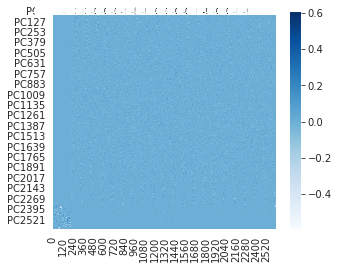

In [41]:
sb.heatmap(comps, cmap="Blues", annot=True)

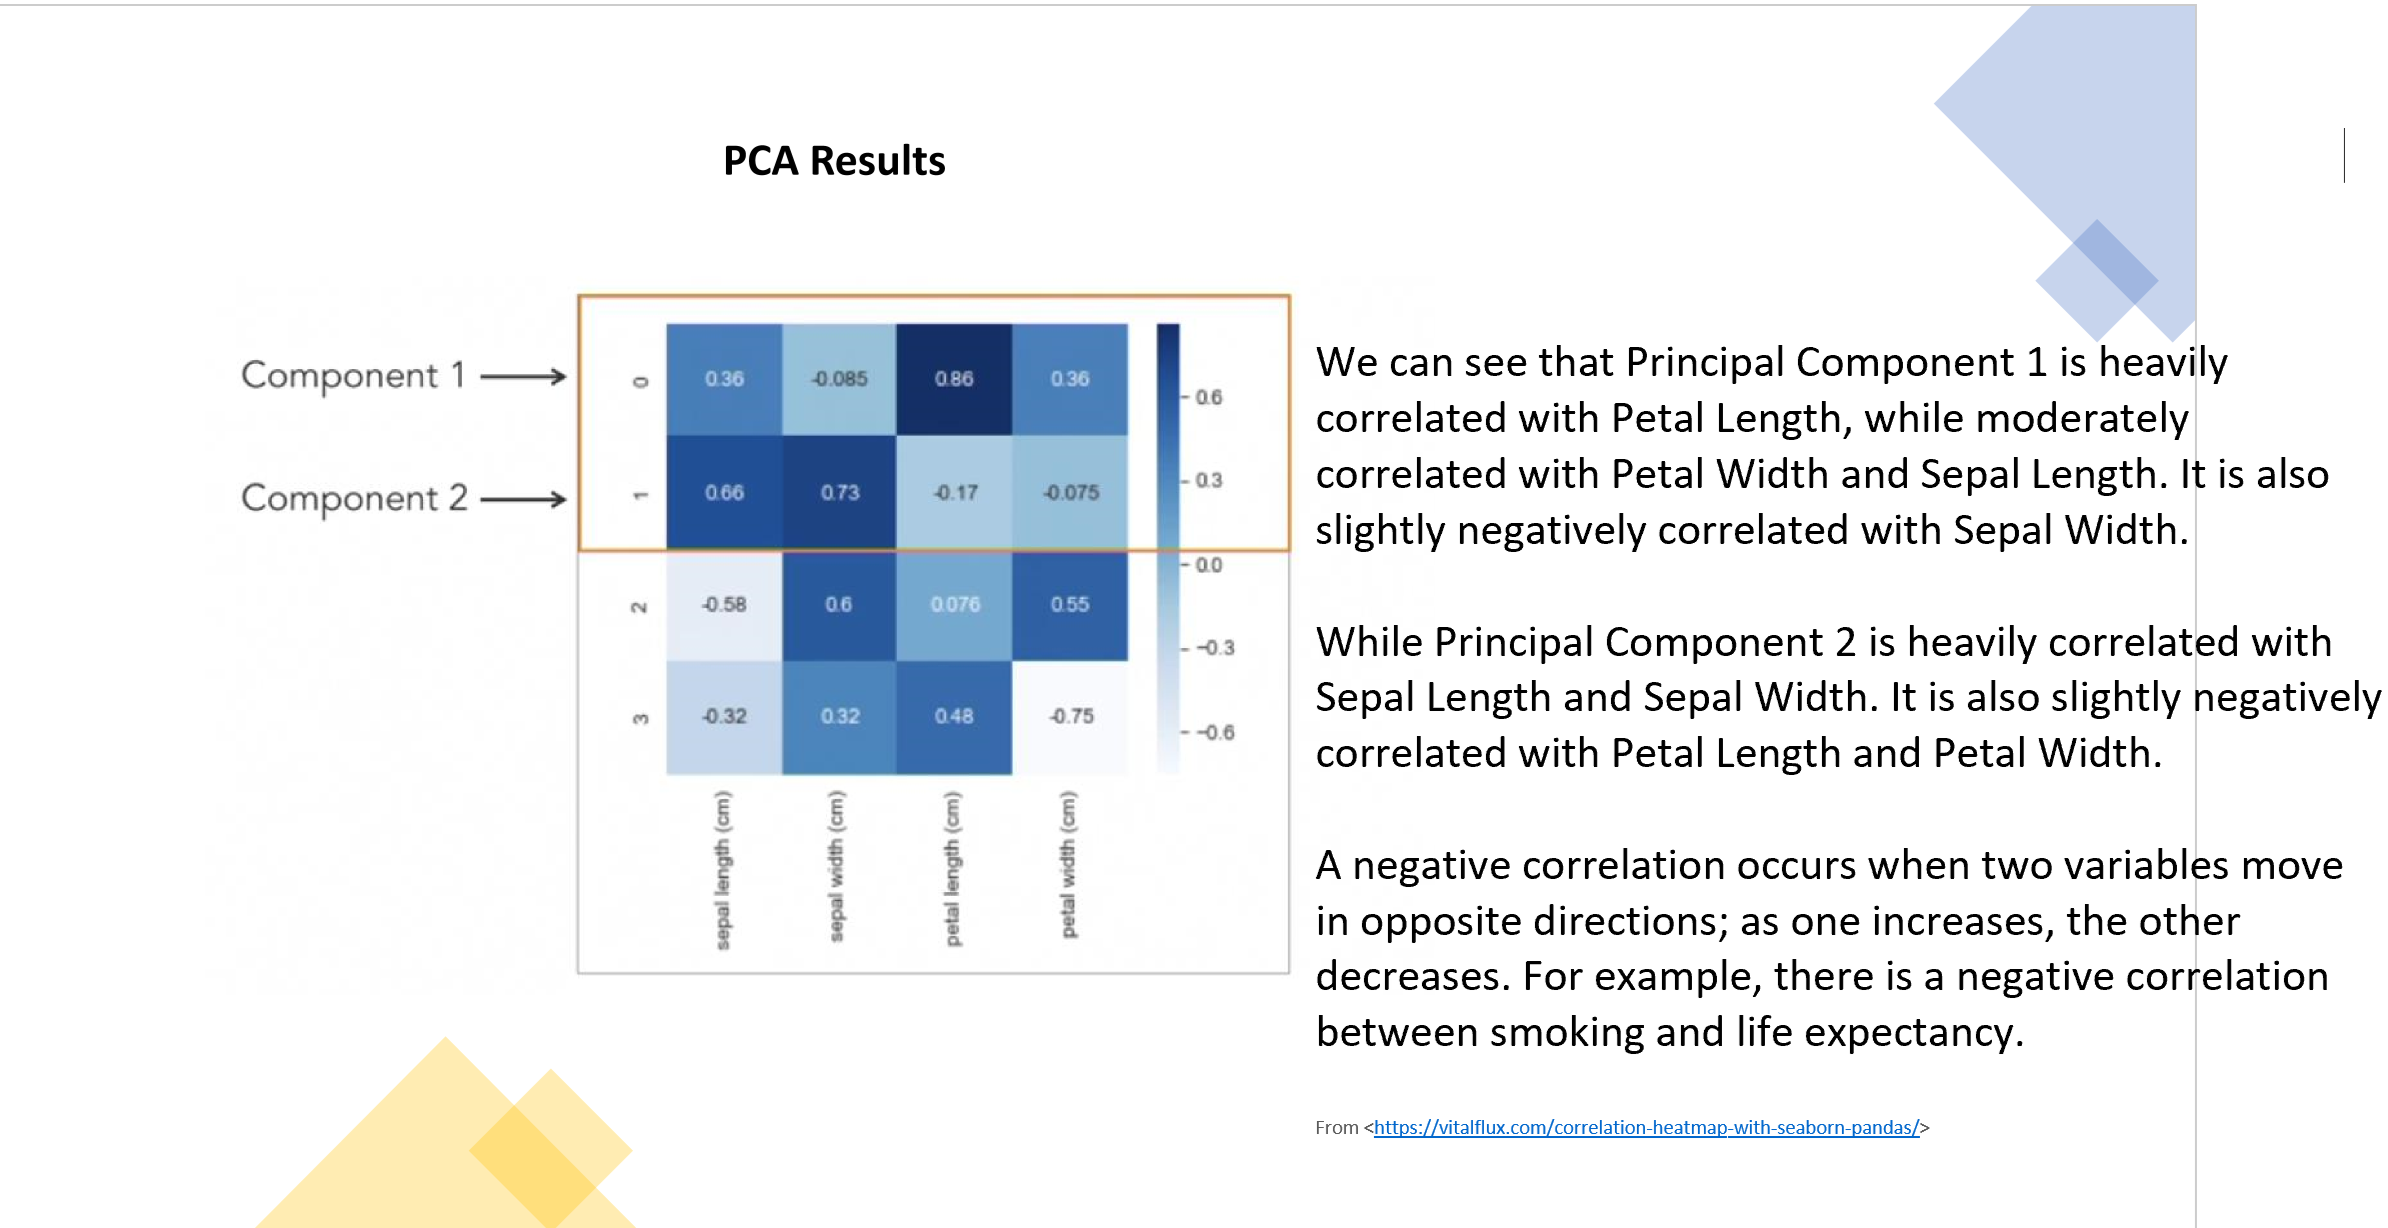

Once we have isolated these Principal components, we can use them as input variables for machine learning algorithms. In this case, we will use these two components we have generated as inputs for a classifier in order to predict species labels for new incoming data points.